# 1. 데이터 선정 및 가설 설정




## E-commerce shipping data
### Context

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

### Content

The dataset used for model building contained 10999 observations of 12 variables.

The data contains the following information:

* ID: ID Number of Customers.
* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# 2. EDA


In [1]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install -U scikit-learn
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from category_encoders import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, classification_report, f1_score


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/hy215/AI_03_project/main/E-commerce_shipping.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [5]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
df.rename(columns = {'Reached.on.Time_Y.N': 'Reached_on_time'}, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_time      10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_time
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

In [10]:
target = 'Reached_on_time'
features = df.drop(columns = ['Reached_on_time','ID']).columns

train, test = train_test_split(df, test_size=0.2, random_state=2)
train, val = train_test_split(train, test_size = 0.2, random_state = 5)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

X_train.shape, X_val.shape, X_test.shape

((7039, 10), (1760, 10), (2200, 10))

In [11]:
train[target].value_counts(normalize=True)

1    0.596107
0    0.403893
Name: Reached_on_time, dtype: float64

# 3. 모델링

In [12]:
# Random forest
model_rf = make_pipeline(
    OneHotEncoder(),
    MinMaxScaler(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=5, oob_score=True)
)

model_rf.fit(X_train, y_train)

print('훈련 정확도: ', model_rf.score(X_train, y_train))
print('검증 정확도: ', model_rf.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도:  0.6992470521380878
검증 정확도:  0.6695454545454546


In [13]:
from sklearn.model_selection import RandomizedSearchCV

dists_rf = {     
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestclassifier__min_samples_leaf': randint(1, 10),
    'randomforestclassifier__n_estimators': randint(50,100,500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1) # max_features
}

clf_rf = RandomizedSearchCV(
    model_rf, 
    param_distributions=dists_rf, 
    n_iter=100, 
    cv=3,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)
clf_rf.fit(X_train, y_train);

print('최적 하이퍼파라미터:', clf_rf.best_params_)
print('f1_Score: ', clf_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


최적 하이퍼파라미터: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.4000461151073319, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 561, 'simpleimputer__strategy': 'mean'}
f1_Score:  0.6781623641745939


In [14]:
model_rf = clf_rf.best_estimator_

print('훈련 정확도: ', model_rf.score(X_train, y_train))
print('검증 정확도: ', model_rf.score(X_test, y_test))

훈련 정확도:  0.69470095183975
검증 정확도:  0.6840909090909091


In [15]:
y_pred = model_rf.predict(X_val)
print('\n <검증 정확도> \n', accuracy_score(y_val, y_pred))
print("\n <classification_report> \n ", classification_report(y_pred, y_val))
print("\n <f1 score> \n ", f1_score(y_pred, y_val))


 <검증 정확도> 
 0.6880681818181819

 <classification_report> 
                precision    recall  f1-score   support

           0       0.94      0.57      0.71      1177
           1       0.52      0.93      0.66       583

    accuracy                           0.69      1760
   macro avg       0.73      0.75      0.69      1760
weighted avg       0.80      0.69      0.69      1760


 <f1 score> 
  0.6629834254143646


In [16]:
# XGBoost
model_xgb = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='mean'),
    XGBClassifier(n_estimators=100, random_state=2, n_jobs=-1, max_depth=2)
)

model_xgb.fit(X_train, y_train);

print('훈련 정확도: ', model_xgb.score(X_train, y_train))
print('검증 정확도: ', model_xgb.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도:  0.6931382298621963
검증 정확도:  0.6831818181818182


In [17]:
y_pred_xgb = model_xgb.predict(X_val)
print('\n <검증 정확도> \n', accuracy_score(y_val, y_pred_xgb))
print("\n <classification_report> \n ", classification_report(y_pred_xgb, y_val))
print("\n <f1 score> \n ", f1_score(y_pred_xgb, y_val))


 <검증 정확도> 
 0.6875

 <classification_report> 
                precision    recall  f1-score   support

           0       0.89      0.57      0.70      1104
           1       0.55      0.88      0.68       656

    accuracy                           0.69      1760
   macro avg       0.72      0.73      0.69      1760
weighted avg       0.76      0.69      0.69      1760


 <f1 score> 
  0.6768507638072856


# 4. Set threshold, ROC curve

In [18]:
y_pred_proba = model_xgb.predict_proba(X_val)[:, 1]
y_pred_proba

array([0.50412756, 0.99855644, 0.99931943, ..., 0.46636406, 0.4958985 ,
       0.43059283], dtype=float32)

False    1104
True      656
dtype: int64

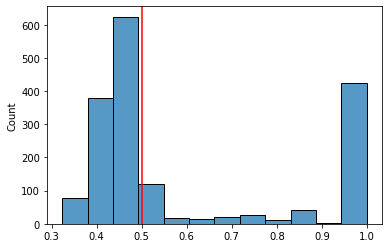

In [19]:
threshold = 0.5
y_pred_proba = model_xgb.predict_proba(X_val)[:, 1]
y_pred = y_pred_proba > threshold

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

In [20]:
print(f'Predict Model Accuracy = {accuracy_score(y_val, y_pred):.4f}')
print(f'F_Beta_Score = {f1_score(y_val,y_pred):.4f}')

Predict Model Accuracy = 0.6875
F_Beta_Score = 0.6769


In [24]:
from sklearn.metrics import roc_curve

# roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.999486
1,0.000000,0.001912,0.999486
2,0.000000,0.003824,0.999485
3,0.000000,0.004780,0.999465
4,0.000000,0.006692,0.999459
...,...,...,...
572,0.991597,0.996176,0.351744
573,0.991597,0.998088,0.349556
574,0.994398,0.998088,0.345569
575,0.994398,1.000000,0.341890


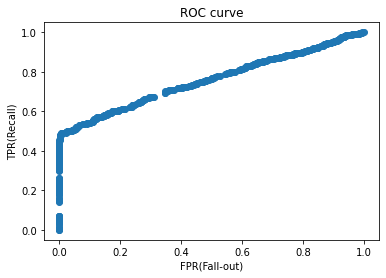

In [25]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [26]:
# threshold 최대값의 인덱스
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 111 , threshold: 0.6782707


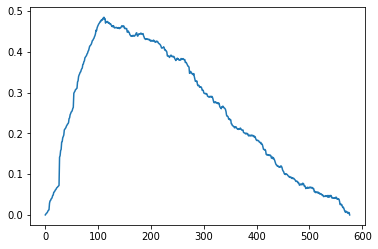

In [27]:
plt.plot(tpr-fpr);

In [28]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.57      0.99      0.73       714
           1       0.99      0.49      0.66      1046

    accuracy                           0.69      1760
   macro avg       0.78      0.74      0.69      1760
weighted avg       0.82      0.69      0.68      1760



In [29]:
# threshold 0.5 와 비교
y_pred_05 = y_pred_proba >= 0.5
print(classification_report(y_val, y_pred_05))

              precision    recall  f1-score   support

           0       0.57      0.89      0.70       714
           1       0.88      0.55      0.68      1046

    accuracy                           0.69      1760
   macro avg       0.73      0.72      0.69      1760
weighted avg       0.75      0.69      0.69      1760



In [30]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.7589021268163096